![](Logo.png)

# <font color='red'>Week 11 - Machine Learning Algorithms</font>

> ## Linear Regression
> ## Logistic Regression
> ## Principal Components
> ## K Means Clustering
> ## K Nearest Neighbor
> ## Support Vector Machines
> ## Decision Trees and Random Forests
> ## Neural Networks

# <font color='red'>Machine Learning</font>

Machine learning is a method of data analysis that automates analytical model building

Using algorithms that iteratively learn from data, machine learning allows computers to find hidden insights without being explicitly programmed where to look

## Machine Learning Process:

![](process.png)

## Machine Learning Algorithms:

![](mla.png)

### Supervised Learning

Supervised learning algorithms are trained using labeled examples, such as an input where the desired output is known

Examples:

    Peanut breeding lines could have data points labeled either 'Selected' or 'Not Selected' (Nominal, Categorical)

    Peanut breeding lines have values for yield on a pounds per acre (lbs./acre) basis (Continuous)
    
    Peanut breeding lines could have data points labeled either '0', '1', or '2' for a group (Ordinal, Categorical)

The learning algorithm receives a set of inputs along with the corresponding correct outputs, and the algorithm learns by comparing the actual output with correct outputs to find errors.

It then modifies the model accordingly

Through methods like classification, regression, prediction and gradient boosting, supervised learning uses patterns to predict the values of the label on additional "unlabeled" data - predictions

Supervised learning is commonly used in applications where historical data predicts likely future events.

### Unsupervised Learning

Unsupervised learning is used for data that has no historical labels or target variable to predict

The system is not told the 'right answer' so the algorithm must figure out what is being shown

The goal of unsupervised learning is to explore the data and find hidden structures or patterns

It can find the main attributes that separate groups or segments from each other

Popular techniques include: 
    
  * Self-organizing maps
  * Nearest-neighbor mapping 
  * K-means clustering
  * Singular value decomposition
  
Additional uses for unsupervised learning algorithms are text topics (text analysis), recommendations, and identify outliers

### Reinforcement Learning

Reinforcement learning has three primary components:

    1. The agent (the learner or decision maker)
    2. The environment (everything with which the agent interacts)
    3. The action (what the agent can do)
    
The objective of the agent is to chose actions that maximize the expected reward over a given amount of time

The agent will reach the goal much faster by following 'good policy'

** **We won't be covering reinforcement learning**

# <font color='red'>Linear Regression Lecture</font>

Linear Regression is a supervised learning algorithm, meaning we'll have labeled data and try to predict new labels on unlabeled data. We'll explore some of the following concepts:

* Get our Data
* Exploratory Data Analysis (EDA)
* Clean our Data
* Review of Model Form
* Train and Test Groups
* Linear Regression Model

## Get our Data

We will use the Student Performance Data Set from UC Irvine's Machine Learning Repository. Download this data our just use the supplied csv files in the notebook repository. We'll specifically look at the math class (student-mat.csv). Make sure to take note that the delimiter is a semi-colon.

In [1]:
# Read CSV, note the delimiter (sep)
df <- read.csv('student-mat.csv',sep=';')

In [2]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
summary(df)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

### Attribute Information
Here is the attribute information for our data set: Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - more than 1 hour)
* 14 studytime - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
* 15 failures - number of past class failures (numeric: n if between 1 and 3 , else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)
these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)

## Clean the Data

Next we have to clean this data. This data is actually already cleaned for you, but here are some things you may want to consider doing for other data sets:

Check for NA values
Let's see if we have any NA values:

In [4]:
any(is.na(df))

[1] FALSE

Most real data sets will probably have NA or Null values, so its always good to check. Its up to you how to deal with them, either dropping them if they aren't too many, or imputing other values, like the mean value.

## Categorical Features

Moving on, let's make sure that categorical variables have a factor set to them. For example, the MJob column refers to categories of Job Types, not some numeric value from 1 to 5. R is actually really good at detecting these sort of values and will take care of this work for you and save a lot of the time, but always keep in mind the use of factor() as a possibility. Luckily this is basically already done. We can check this using the str() function:

In [5]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

## Exploratory Data Analysis
Let's use ggplot2 to explore the data. Feel free to expand on this section:

In [6]:
library(ggplot2)
library(ggthemes)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Correlation and CorrPlots
Correlation is defined as:

In statistics, dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. Familiar examples of dependent phenomena include the correlation between the physical statures of parents and their offspring, and the correlation between the demand for a product and its price.

Correlation plots are a great way of exploring data and seeing if there are any interaction terms. Let's start off by just grabbing the numeric data (we can't see correlation for categorical data):

In [7]:
# Grab only numeric columns
num.cols <- sapply(df, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(df[,num.cols])

cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


While this is fantastic information, it's hard to take it all in. Let's visualize all this data. There are lots of amazing 3rd party packages to do this, let's use and install the 'corrgram' package and the corrplot package. This will also install a bunch of dependencies for the package.

In [8]:
install.packages(c('corrplot','corrgram'))
library(corrplot)
library(corrgram)

package 'corrplot' successfully unpacked and MD5 sums checked
package 'corrgram' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\RtmpeMrhpS\downloaded_packages


corrplot 0.84 loaded
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Let's start by using corrplot, the most common one. Here's a really nice [documentation page](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) on the package. I encourage you to play around with it.

Cleary we have very high correlation between G1, G2, and G3 which makes sense since those are grades:

* 31 G1 - first period grade (numeric: from 0 to 20)
* 32 G2 - second period grade (numeric: from 0 to 20)
* 33 G3 - final grade (numeric: from 0 to 20, output target)

Meaning good students do well each period, and poor students do poorly each period, etc. Also a high G1,G2, or G3 value has a negative correlation with failure (number of past class failures).

Also Mother and Father education levels are correlated, which also makes sense.

We can also use the corrgram which allows to just automatically do these type of figures by just passing in the dataframe directly. There's a lot going on here, so reference the documentation of corrgram for more info.

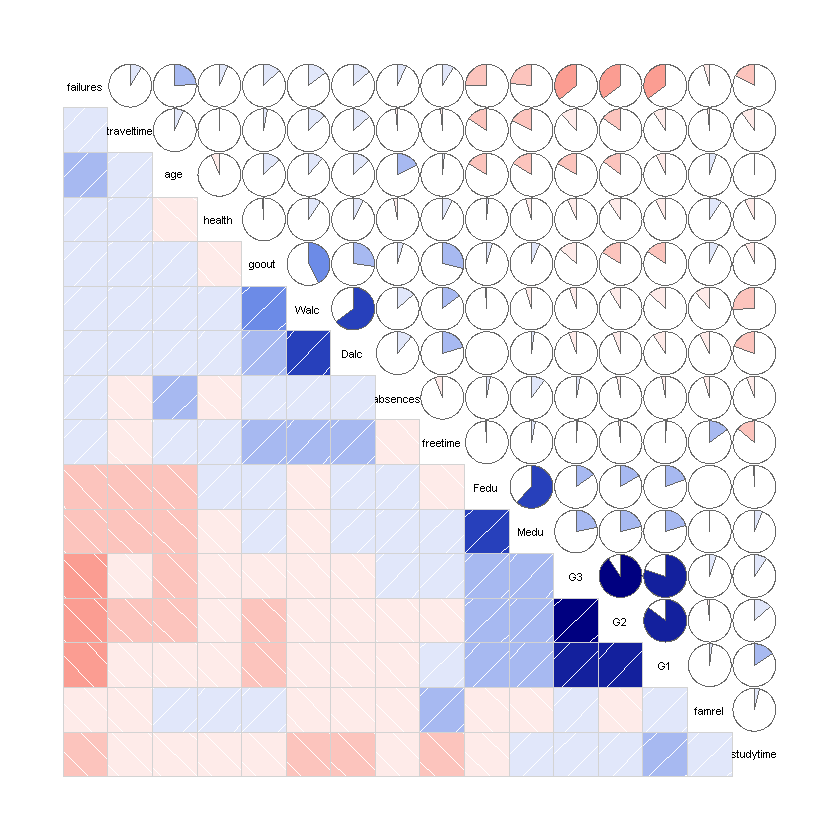

In [9]:
corrgram(df,order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt)

Since we're going to eventually try to predict the G3 score let's see a histogram of these scores:

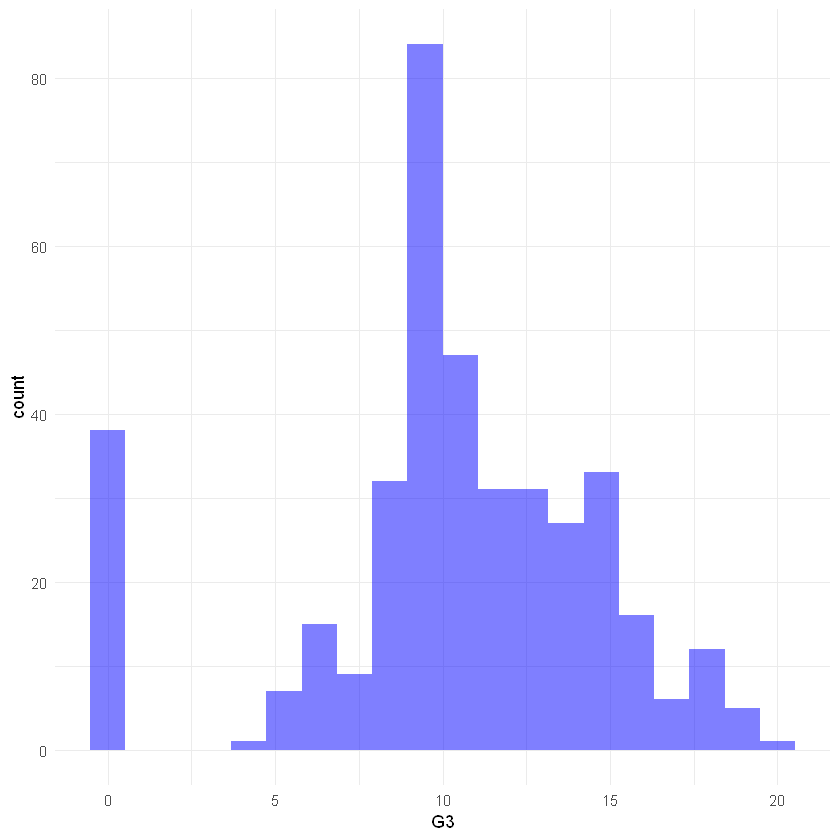

In [10]:
ggplot(df,aes(x=G3)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

Looks like quite a few students get a zero. This is a good place to ask questions, like are students missing the test? Also why is the mean occurence so high? Is this test curved?

Let's continue by building a model

## Building a Model

#### General Form:
The general model of building a linear regression model in R looks like this:

model <- lm(y ~ x1 + x2,data)

or to use all the features in your data

model <- lm(y ~. , data) # Uses all features

## Train and Test Data
We'll need to split our data into a training set and a testing set in order to test our accuracy. We can do this easily using the caTools library:

In [11]:
install.packages('caTools')
# Import Library
library(caTools)
# Set a random see so your "random" results are the same as this notebook
set.seed(101) 

# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(df$age, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)

package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\jcdunne\AppData\Local\Continuum\anaconda3\Lib\R\library\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\jcdunne\AppData\Local\Continuum\anaconda3\Lib\R\library\caTools\libs\x64\caTools.dll: Permission denied"Warning message:
"restored 'caTools'"


The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\RtmpeMrhpS\downloaded_packages


## Training our Model
Let's train our model on our training data, then ask for a summary of that model:

In [13]:
model <- lm(G3 ~ .,train)

In [16]:
summary(model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7681 -0.6423  0.2294  1.0691  4.5942 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.329568   2.474569  -0.537 0.591574    
schoolMS          0.838581   0.470545   1.782 0.076016 .  
sexM              0.034883   0.275586   0.127 0.899382    
age              -0.214994   0.119579  -1.798 0.073472 .  
addressU          0.067190   0.326035   0.206 0.836905    
famsizeLE3       -0.111068   0.283228  -0.392 0.695302    
PstatusT         -0.153653   0.401679  -0.383 0.702417    
Medu              0.279949   0.171111   1.636 0.103164    
Fedu             -0.221275   0.151103  -1.464 0.144422    
Mjobhealth        0.002065   0.610532   0.003 0.997304    
Mjobother         0.509947   0.403195   1.265 0.207209    
Mjobservices      0.475476   0.435332   1.092 0.275857    
Mjobteacher       0.285345   0.550640   0.518 0.604802    
Fjobhealth        0.433

## Model Interpretation
Looks like Absences, Famrel, G1, and G2 scores are good predictors. With Age and SchoolMS also possibly contributing to a good model.

## Visualize our Model
We can visualize our linear regression model by plotting out the residuals, the residuals are basically a measure of how off we are for each point in the plot versus our model (the error).

In [17]:
# Grab residuals
res <- residuals(model)

# Convert to DataFrame for gglpot
res <- as.data.frame(res)

head(res)

,res
,<dbl>
1,0.9678451
5,1.1829980
6,-1.4096050
7,0.1125706
9,0.3814670
10,0.3221204


## Why Plot Residuals?
We want a histogram of our residuals to be normally distributed, something with a strong bimodal distribution may be a warning that our data was not a good fit for lienar regression. However, this can also be hidden from our model. A famous example is Anscombe's Quartet

![](anscombe.png)

## Using ggplot to plot residuals

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


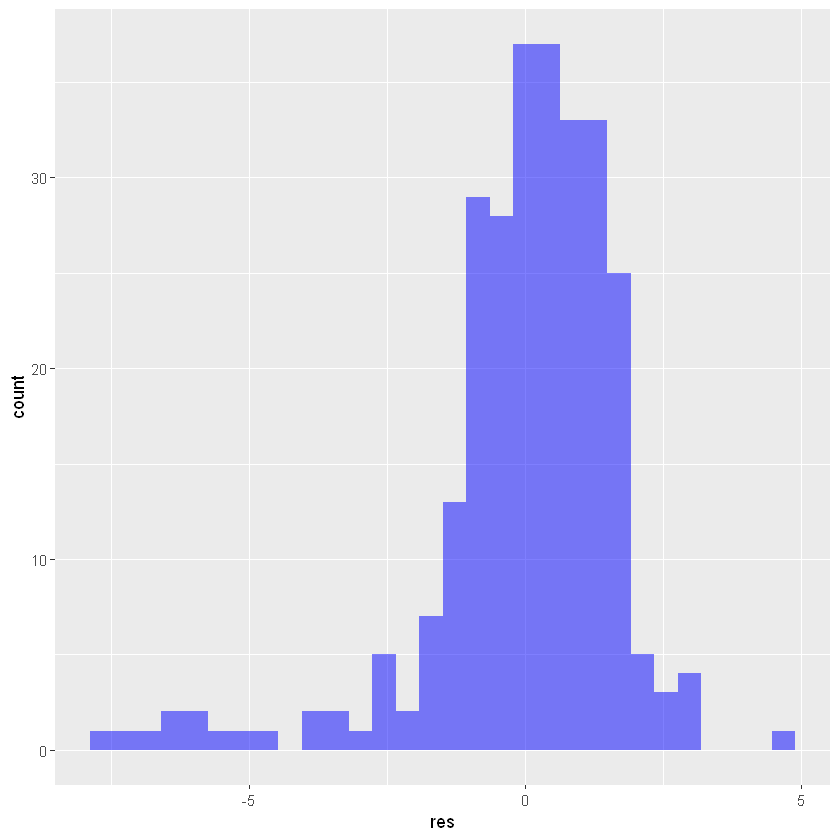

In [18]:
# Histogram of residuals
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

Looks like there are some suspicious residual values that have a value less than -5. We can further explore this by just calling plot on our model. What these plots represent is outside the course of this lecture.

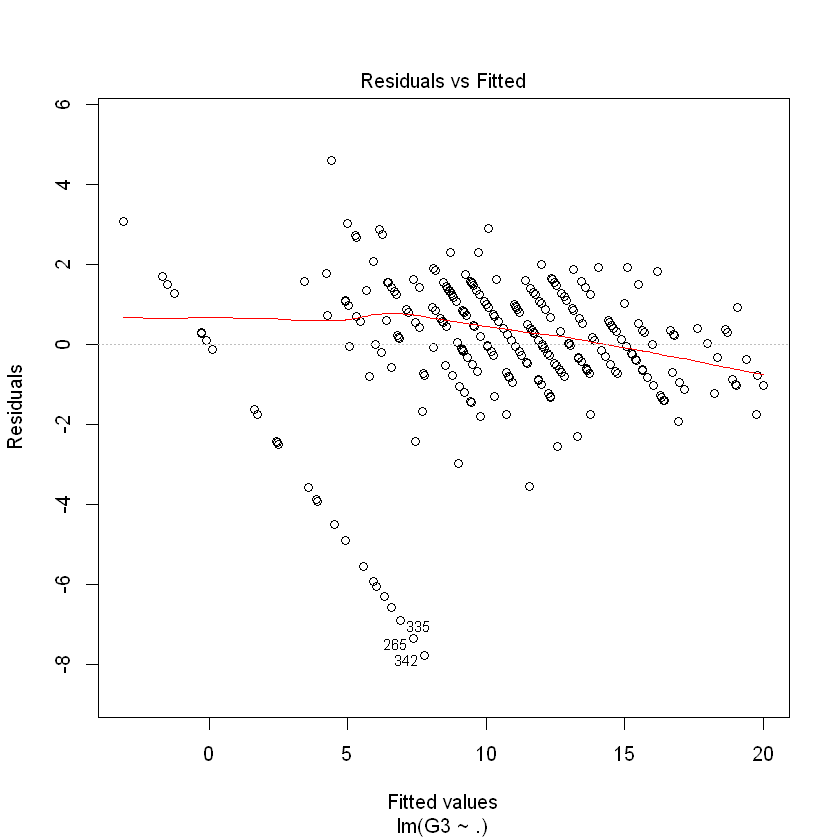

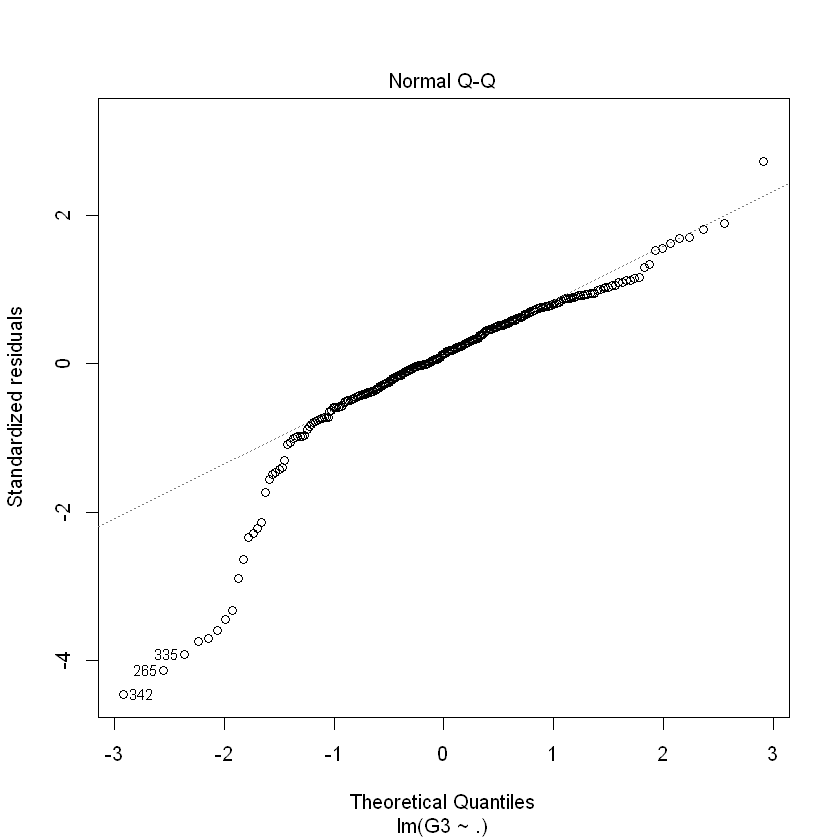

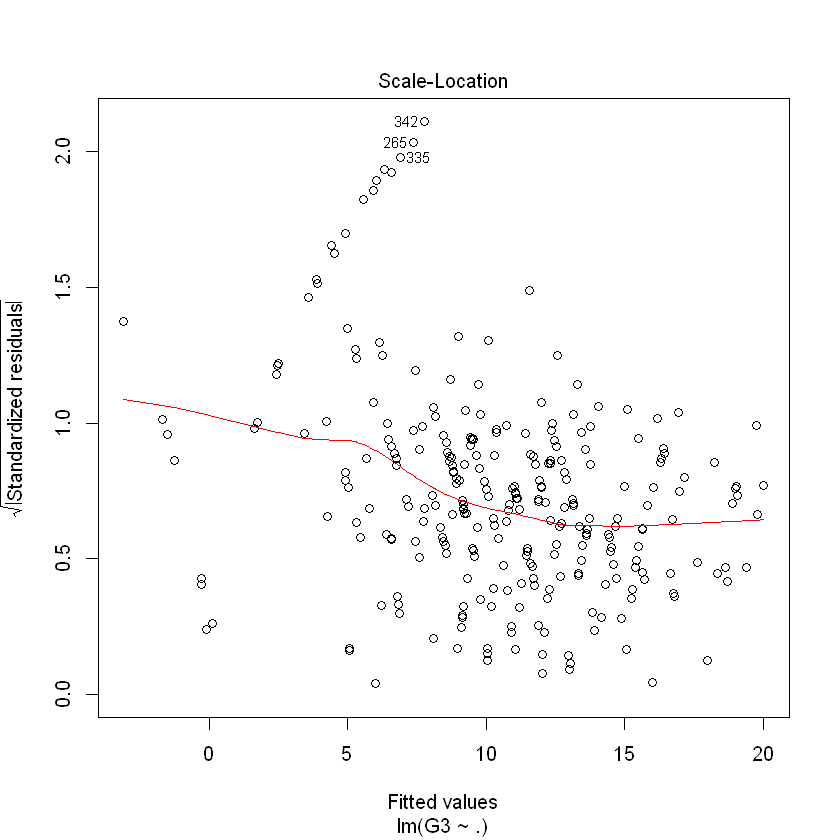

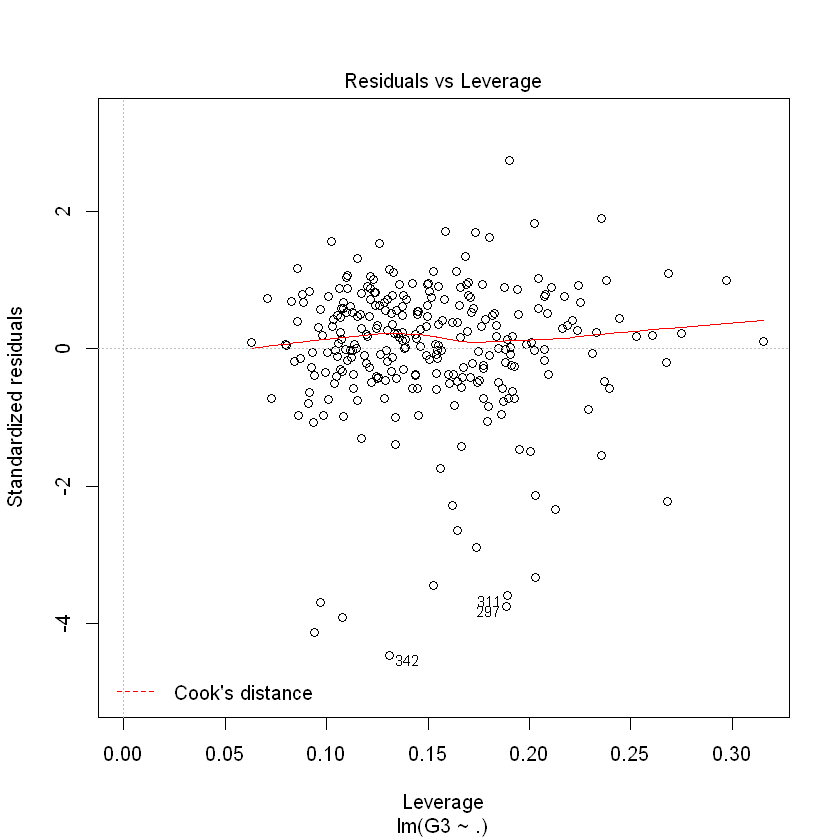

In [19]:
plot(model)

Basically, after looking at these plots what you will realize is that our model (behaving as a continuous line), predicted students would get negative scores on their test. Let's make these all zeros when running our results against our predictions.

## Predictions
Let's test our model by predicting on our testing set:

In [14]:
G3.predictions <- predict(model,test)

Now we can get the root mean squared error, a standardized measure of how off we were with our predicted values:

In [16]:
results <- cbind(G3.predictions,test$G3) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
head(results)

,pred,real
,<dbl>,<dbl>
2,3.835533,6
3,7.148456,10
4,13.257794,15
8,5.088100,6
15,14.934291,16
16,13.835679,14


Now let's take care of negative predictions. Lot's of ways to this, here's a more complicated way, but its a good example of creating a custom function for a custom problem:

In [17]:
to_zero <- function(x){
    if  (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [18]:
results$pred <- sapply(results$pred,to_zero)

## Evaluate Predictions

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

There's lots of ways to evaluate the prediction values, for example the MSE (mean squared error):

In [19]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 4.411405


Or the root mean squared error:

In [20]:
mse^0.5

[1] 2.100335

Or just the R-Squared Value for our model (just for the predictions)

In [21]:
SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$G3) - results$real)^2)

R2 = 1 - SSE/SST
R2

[1] 0.7779023

# <font color='red'>Logistic Regression</font>
For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning. We'll be trying to predict a classification- survival or deceased.

Let's begin our understanding of implementing Logistic Regression in R for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this notebook.

## The Data
We can begin by loading in our training data into data frames:

In [27]:
df.train <- read.csv('titanic_train.csv')

In [28]:
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


## Exploratory Data Analysis (EDA)
Let's explore how much missing data we have. We can use the Amelia pacakge for this.

package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


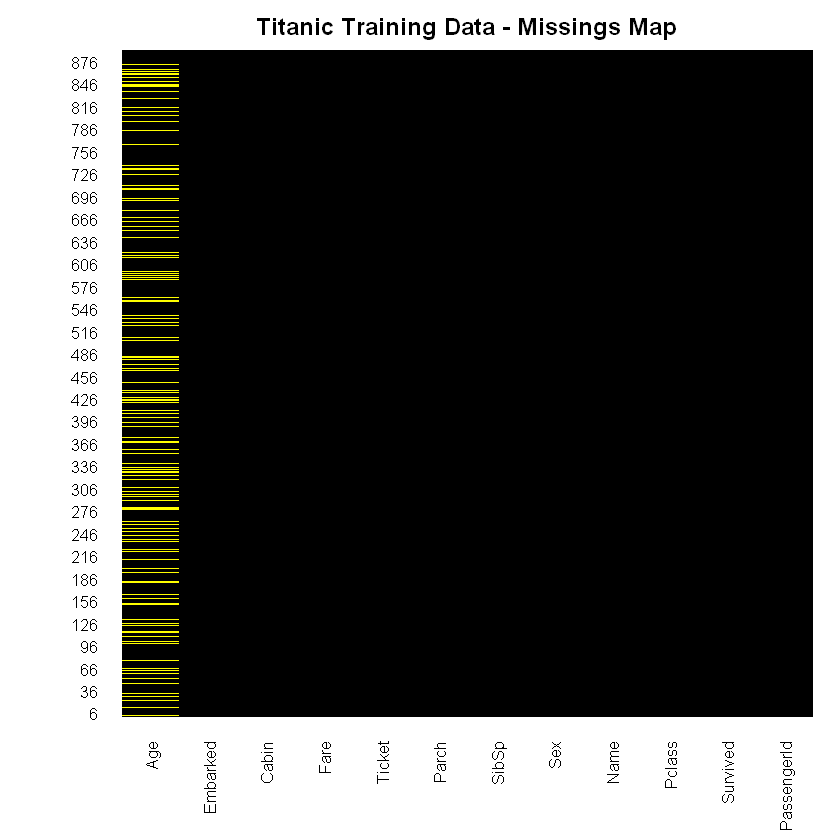

In [29]:
install.packages('Amelia')
library(Amelia)
missmap(df.train, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

Roughly 20 percent of the Age data is missing. The proportion of Age "missings" is likely small enough for reasonable replacement with some form of imputation.

Let's continue on by visualizing some of the data.

## Data Visualization with ggplot2

In [30]:
library(ggplot2)

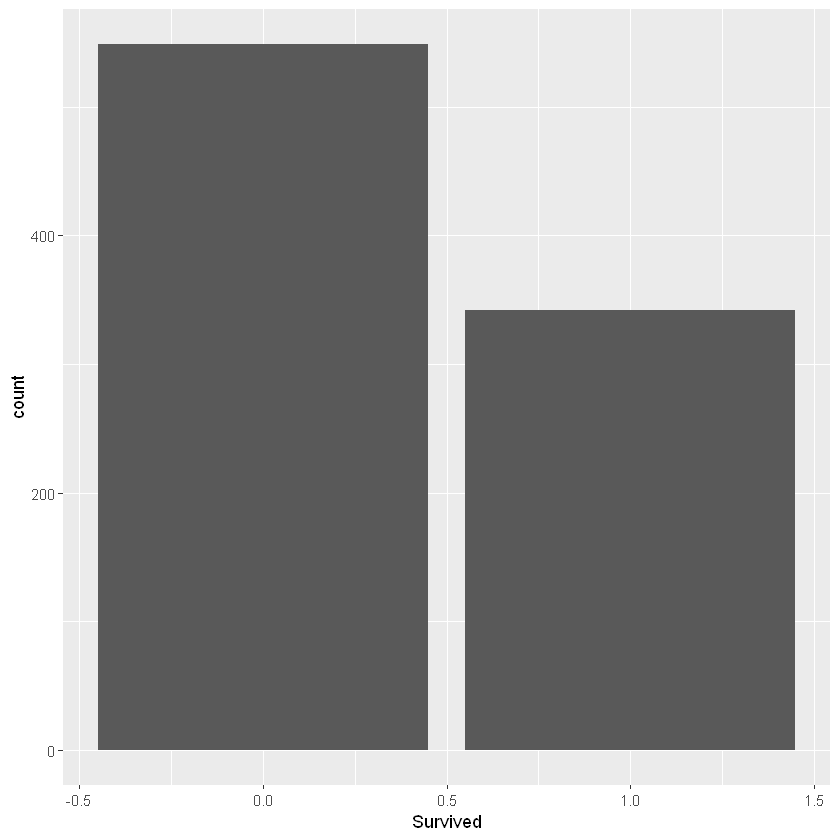

In [31]:
ggplot(df.train,aes(Survived)) + geom_bar()

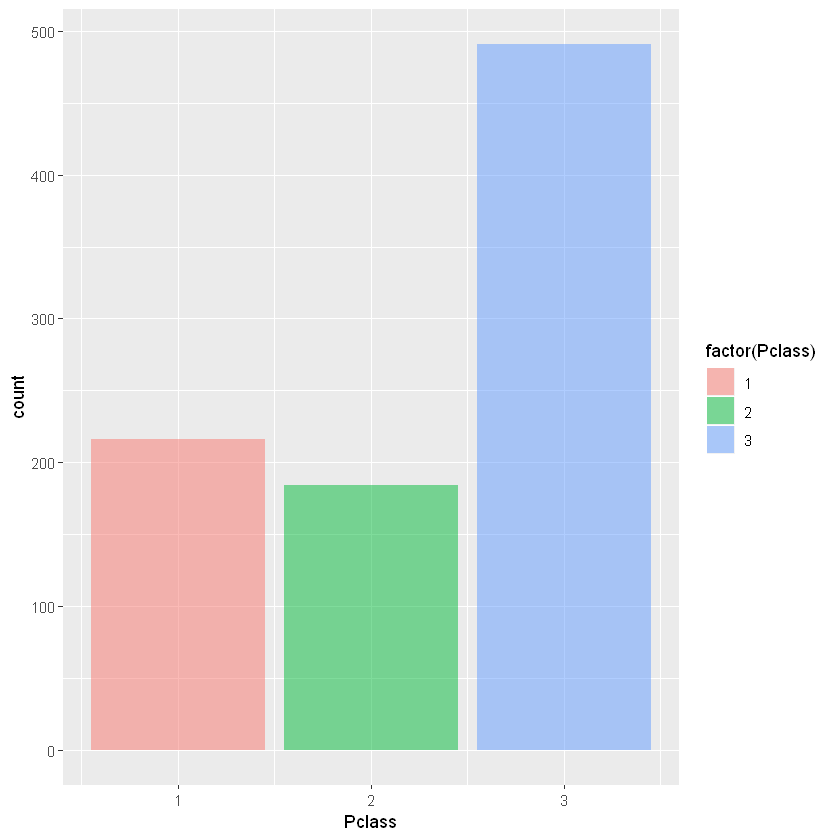

In [32]:
ggplot(df.train,aes(Pclass)) + geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

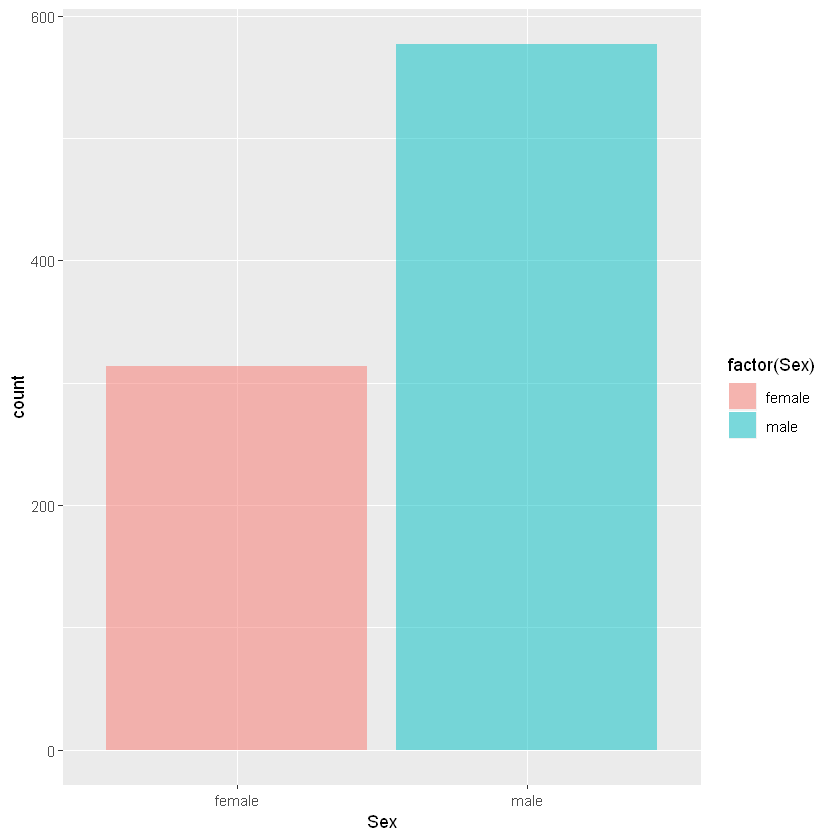

In [33]:
ggplot(df.train,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

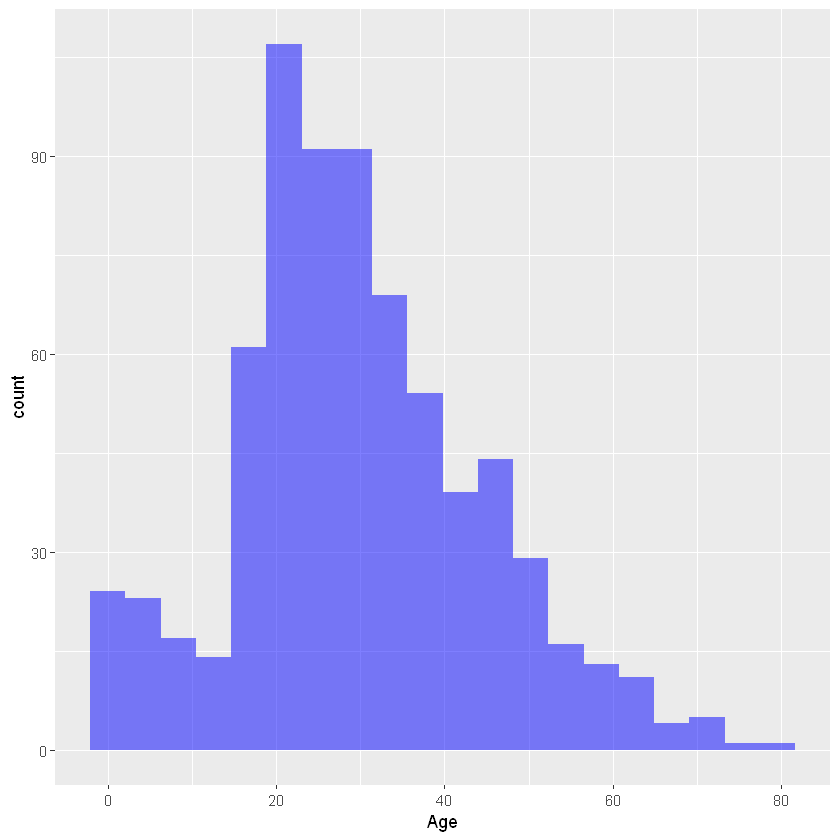

In [34]:
ggplot(df.train,aes(Age)) + geom_histogram(fill='blue',bins=20,alpha=0.5)

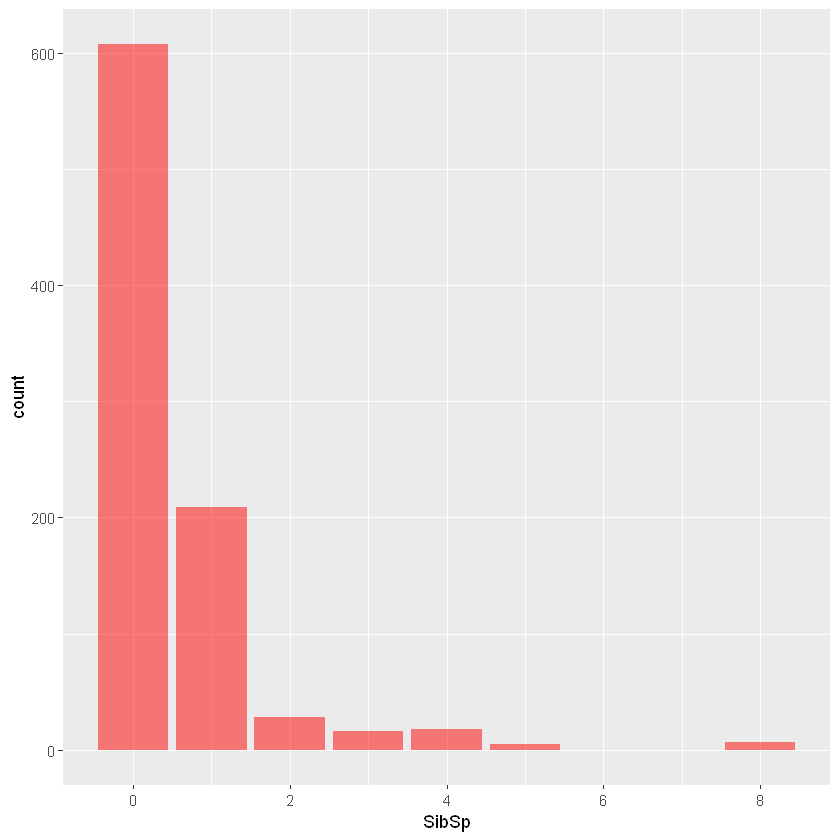

In [35]:
ggplot(df.train,aes(SibSp)) + geom_bar(fill='red',alpha=0.5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


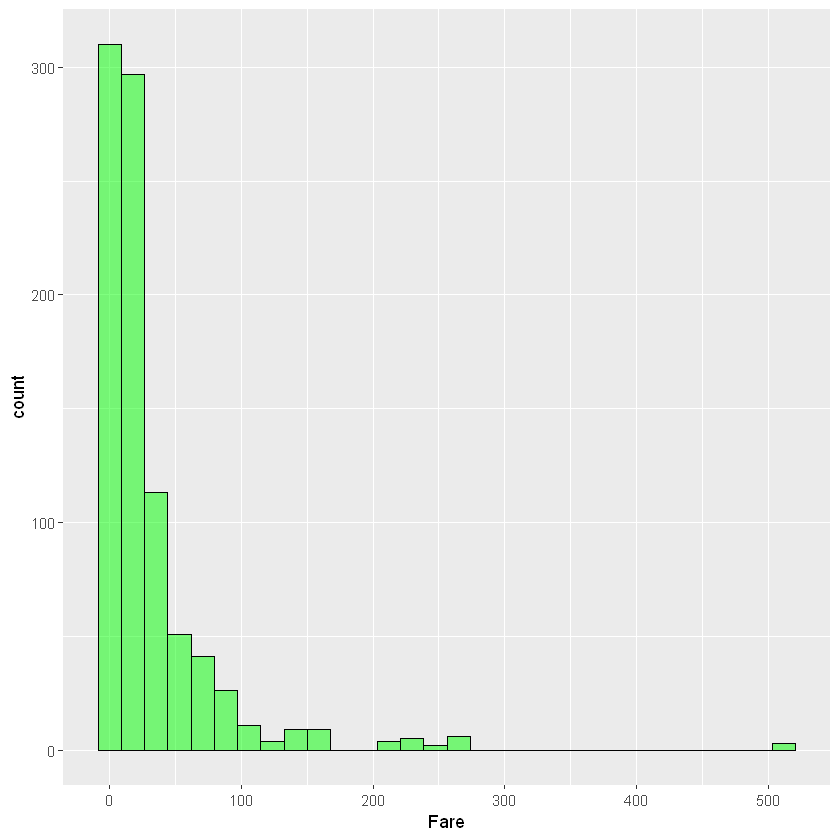

In [36]:
ggplot(df.train,aes(Fare)) + geom_histogram(fill='green',color='black',alpha=0.5)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

However we can be smarter about this and check the average age by passenger class. For example:

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

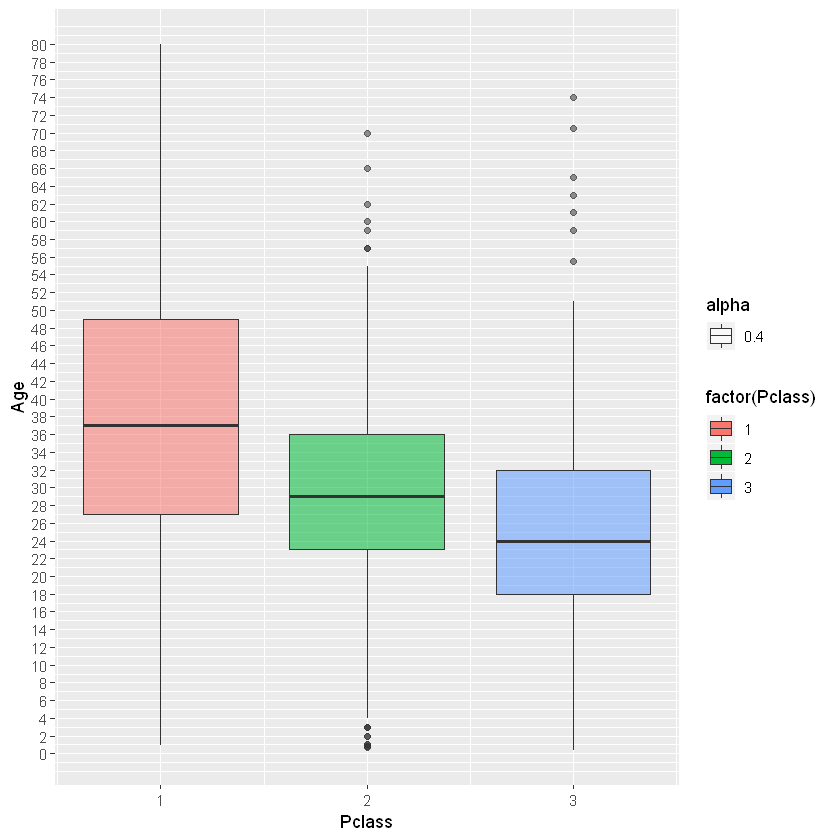

In [37]:
pl <- ggplot(df.train,aes(Pclass,Age)) + geom_boxplot(aes(group=Pclass,fill=factor(Pclass),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [38]:
impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [39]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)

In [40]:
df.train$Age <- fixed.ages

Now let's check to see if it worked:

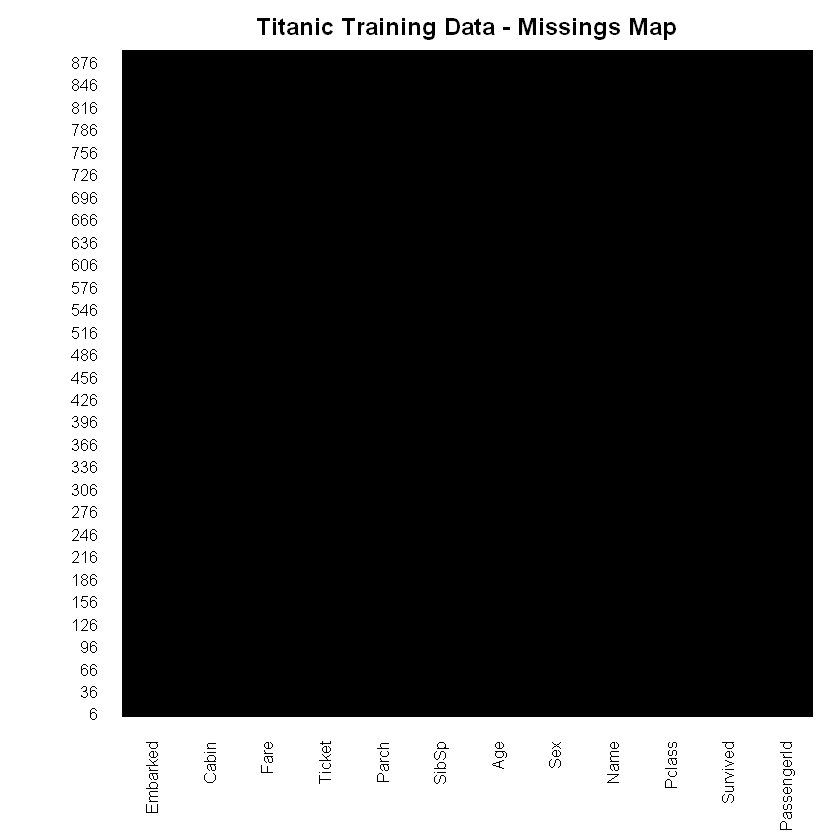

In [41]:
missmap(df.train, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

Let's continue with building our model

## Building a Logistic Regression Model
Now it is time to build our model. Let's begin by doing a final "clean-up" of our data by removing the features we won't be using and making sure that the features are of the correct data type.

In [42]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


Let's remove what we won't use:

In [43]:
head(df.train,3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


Let's select the relevant columns for training:

In [44]:
library(dplyr)

In [45]:
df.train <- select(df.train,-PassengerId,-Name,-Ticket,-Cabin)

In [46]:
head(df.train,3)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S


Now let's set factor columns.

In [47]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [48]:
# Convert int to factors
df.train$Survived <- factor(df.train$Survived)
df.train$Pclass <- factor(df.train$Pclass)
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

## Train the Model
Now let's train the model

In [49]:
log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = df.train)

In [50]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6134  -0.4138   0.5808   2.4896  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.845e+01  1.660e+03   0.011 0.991134    
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp1       8.135e-02  2.245e-01   0.362 0.717133    
SibSp2      -2.897e-01  5.368e-01  -0.540 0.589361    
SibSp3      -2.241e+00  7.202e-01  -3.111 0.001862 ** 
SibSp4      -1.675e+00  7.620e-01  -2.198 0.027954 *  
SibSp5      -1.595e+01  9.588e+02  -0.017 0.986731    
SibSp8      -1.607e+01  7.578e+02  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3   

We can see clearly that Sex, Age, and Class are the most significant features. Which makes sense given the women and children first policy.

## Predicting using Test Cases
Let's make a test set out of our training set, retrain on the smaller version of our training set and check it against the test subset.

In [51]:
library(caTools)
set.seed(101)

split = sample.split(df.train$Survived, SplitRatio = 0.70)

final.train = subset(df.train, split == TRUE)
final.test = subset(df.train, split == FALSE)

Now let's rerun our model on only our final training set:

In [52]:
final.log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = final.train)

In [53]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3

Now let's check our prediction accuracy

In [54]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')

Now let's calculate from the predicted values:

In [55]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)

In [56]:
misClasificError <- mean(fitted.results != final.test$Survived)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.798507462686567"


Looks like we were able to achieve around 80% accuracy, where as random guessing would have just been 50% accuracy. Let's see the confusion matrix:

In [57]:
table(final.test$Survived, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0   140   25
  1    29   74

# <font color='red'>Principal Components</font>

## PCA Review

PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. The use of PCA is for dimension reduction. In statistics and genetics, often there are more data columns than can be modeled (not enough degrees of freedom available). Therefore, some dimensions that are highly correlated can be compressed or reduced into fewer columns using PCAs. 

## The Data

We're going to be using the Wisconsin Breast Cancer dataset hosted by [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv) for the introduction to principle component analysis.

In [58]:
# Read in the dataset
cancer <- read.csv('breast_cancer.csv')

In [59]:
# Head of the data
head(cancer, 10)

ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
7,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
9,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [60]:
# Structure of the data
str(cancer)

'data.frame':	569 obs. of  32 variables:
 $ ID                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se  

In [61]:
# Visualize Diagnosis
library(ggplot2)
theme_set(theme_light())

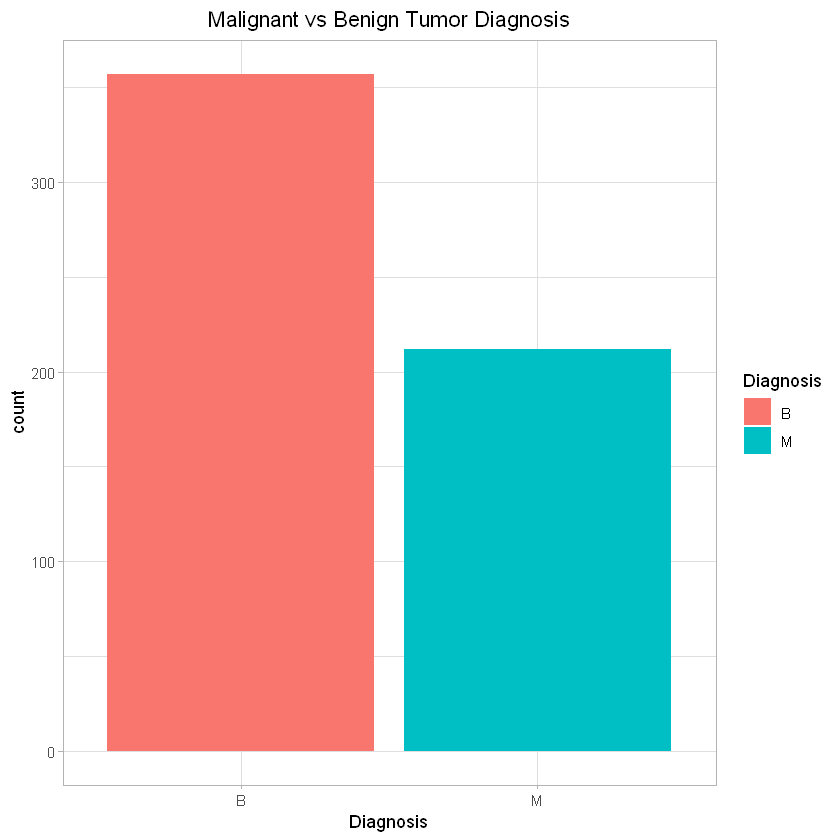

In [62]:
ggplot(cancer, aes(Diagnosis, fill = Diagnosis)) + geom_bar() + ggtitle("Malignant vs Benign Tumor Diagnosis", ) + theme(plot.title = element_text(hjust = 0.5))

In [63]:
# Variance of mean.radius
var(cancer$radius_mean)

[1] 12.41892

In [64]:
# Variance of perimeter.error
var(cancer$perimeter_mean)

[1] 590.4405

In [65]:
# Dimension Reduction using prcomp
cancer.pca <- prcomp(cancer[,c(3:32)], center = TRUE,scale. = TRUE)

In [66]:
summary(cancer.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

In [67]:
str(cancer.pca)

List of 5
 $ sdev    : num [1:30] 3.64 2.39 1.68 1.41 1.28 ...
 $ rotation: num [1:30, 1:30] -0.219 -0.104 -0.228 -0.221 -0.143 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:30] "radius_mean" "texture_mean" "perimeter_mean" "area_mean" ...
  .. ..$ : chr [1:30] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:30] 14.1273 19.2896 91.969 654.8891 0.0964 ...
  ..- attr(*, "names")= chr [1:30] "radius_mean" "texture_mean" "perimeter_mean" "area_mean" ...
 $ scale   : Named num [1:30] 3.524 4.301 24.299 351.9141 0.0141 ...
  ..- attr(*, "names")= chr [1:30] "radius_mean" "texture_mean" "perimeter_mean" "area_mean" ...
 $ x       : num [1:569, 1:30] -9.18 -2.39 -5.73 -7.12 -3.93 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:30] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [68]:
cancer.pca

Standard deviations (1, .., p=30):
 [1] 3.64439401 2.38565601 1.67867477 1.40735229 1.28402903 1.09879780
 [7] 0.82171778 0.69037464 0.64567392 0.59219377 0.54213992 0.51103950
[13] 0.49128148 0.39624453 0.30681422 0.28260007 0.24371918 0.22938785
[19] 0.22243559 0.17652026 0.17312681 0.16564843 0.15601550 0.13436892
[25] 0.12442376 0.09043030 0.08306903 0.03986650 0.02736427 0.01153451

Rotation (n x k) = (30 x 30):
                                PC1          PC2          PC3          PC4
radius_mean             -0.21890244  0.233857132 -0.008531243  0.041408962
texture_mean            -0.10372458  0.059706088  0.064549903 -0.603050001
perimeter_mean          -0.22753729  0.215181361 -0.009314220  0.041983099
area_mean               -0.22099499  0.231076711  0.028699526  0.053433795
smoothness_mean         -0.14258969 -0.186113023 -0.104291904  0.159382765
compactness_mean        -0.23928535 -0.151891610 -0.074091571  0.031794581
concavity_mean          -0.25840048 -0.060165363  0.00

In [69]:
head(cancer.pca$rotation)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,-0.2189024,0.23385713,-0.008531243,0.04140896,-0.03778635,0.018740790,-0.12408834,0.007452296,-0.223109764,0.09548644,⋯,-0.06857001,-0.07292890,-0.0985526942,-0.18257944,-0.01922650,-0.12947640,-0.13152667,2.111940e-01,0.211460455,0.702414091
texture_mean,-0.1037246,0.05970609,0.064549903,-0.60305000,0.04946885,-0.032178837,0.01139954,-0.130674825,0.112699390,0.24093407,⋯,0.44836947,-0.09480063,-0.0005549975,0.09878679,0.08474593,-0.02455666,-0.01735731,-6.581146e-05,-0.010533934,0.000273661
perimeter_mean,-0.2275373,0.21518136,-0.009314220,0.04198310,-0.03737466,0.017308445,-0.11447706,0.018687258,-0.223739213,0.08638562,⋯,-0.06976904,-0.07516048,-0.0402447050,-0.11664888,0.02701541,-0.12525595,-0.11541542,8.433827e-02,0.383826098,-0.689896968
area_mean,-0.2209950,0.23107671,0.028699526,0.05343380,-0.01033125,-0.001887748,-0.05165343,-0.034673604,-0.195586014,0.07495649,⋯,-0.01844328,-0.09756578,0.0077772734,0.06984834,-0.21004078,0.36272740,0.46661248,-2.725083e-01,-0.422794920,-0.032947348
smoothness_mean,-0.1425897,-0.18611302,-0.104291904,0.15938277,0.36508853,-0.286374497,-0.14066899,0.288974575,0.006424722,-0.06929268,⋯,-0.11949175,-0.06382295,-0.0206657211,0.06869742,0.02895489,-0.03700369,0.06968992,1.479269e-03,-0.003434667,-0.004847458
compactness_mean,-0.2392854,-0.15189161,-0.074091571,0.03179458,-0.01170397,-0.014130949,0.03091850,0.151396350,-0.167841425,0.01293620,⋯,0.19262140,0.09807756,0.0523603957,-0.10413552,0.39662323,0.26280847,0.09774871,-5.462767e-03,-0.041016774,0.044674186


In [75]:
# Proportion of variance explained by each principal component
variance <- cancer.pca$sdev^2

Variance.Percent <- round((variance/sum(variance)*100),2)

test <- vector()

for (i in 1:length(Variance.Percent)){
    test <- append(test, paste("PC",i))
    }

Var.Exp <- as.data.frame(Variance.Percent, row.names=test)

head(Var.Exp)

,Variance.Percent
,<dbl>
PC 1,44.27
PC 2,18.97
PC 3,9.39
PC 4,6.60
PC 5,5.50
PC 6,4.02


## PCA Visualization

It is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [76]:
install.packages('ggfortify')

package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


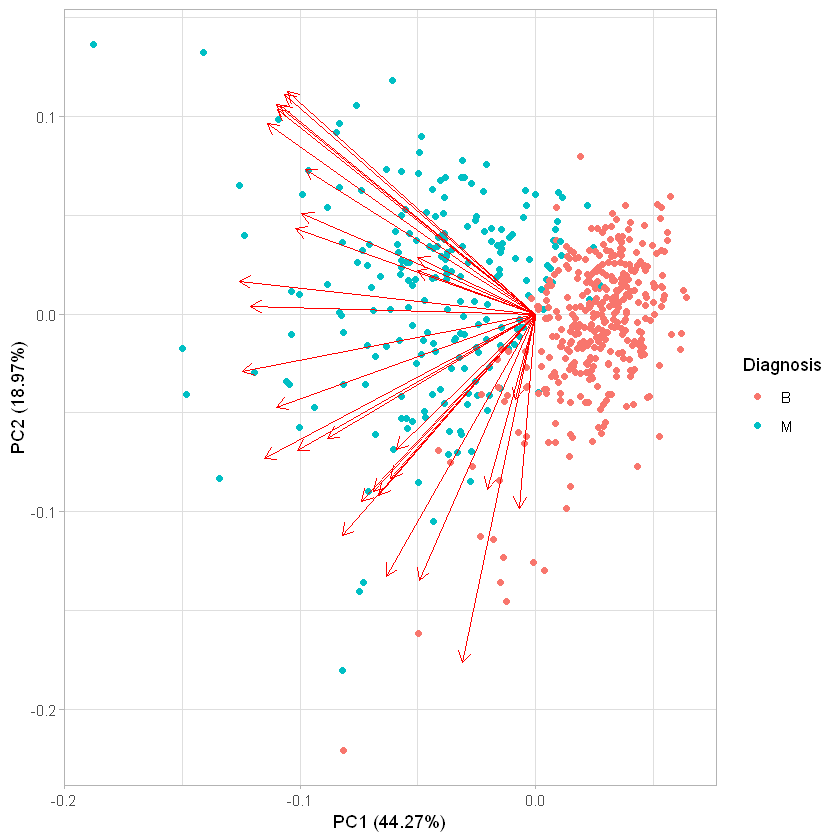

In [77]:
library(ggfortify)
autoplot(cancer.pca, data=cancer, colour='Diagnosis', loadings=TRUE)

In [78]:
#Nice visualization package for PCAs
install.packages('factoextra')
library(factoextra)

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


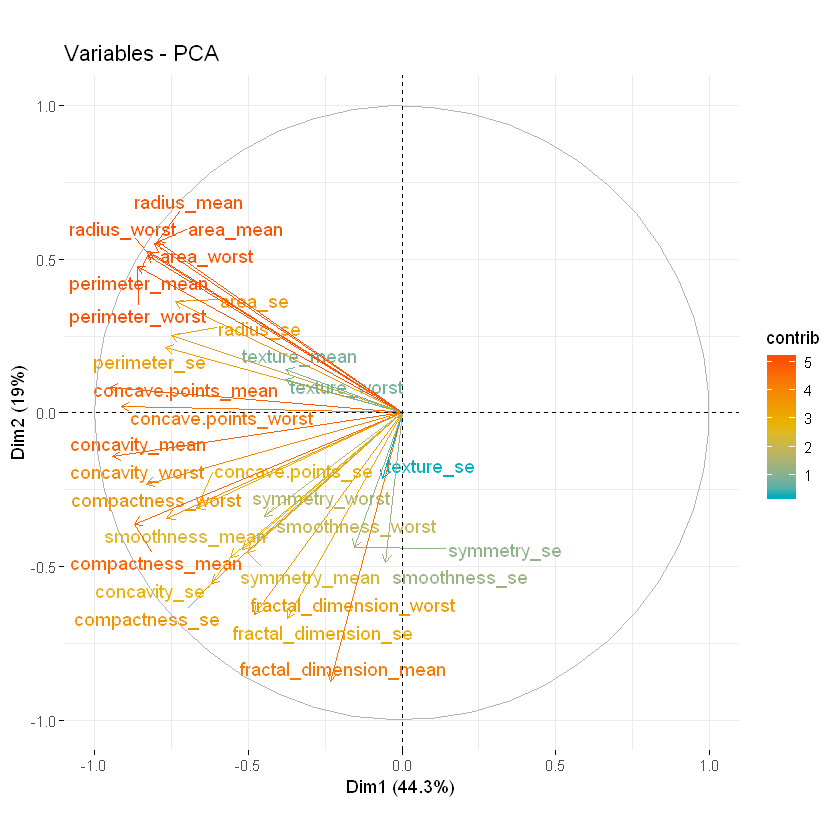

In [79]:
fviz_pca_var(cancer.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

# <font color='red'>K-means Clustering</font>
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have to specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

1. Reassign data points to the cluster whose centroid is closest. 
2. Calculate new centroid of each cluster. 

These two steps are repeated until the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.


## Get the Data
We will use the iris data set. The iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In [80]:
library(datasets)

In [81]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


## EDA

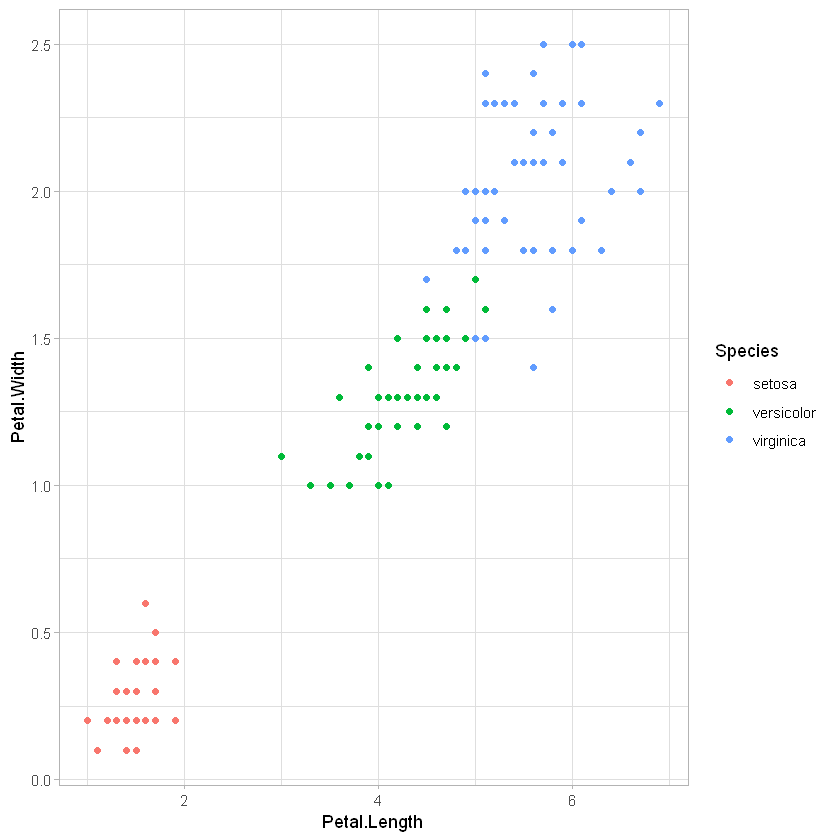

In [82]:
library(ggplot2)
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point()

## Clustering
Now let's attempt to use the K-means algorithm to cluster the data. Remember that this is an unsupervised learning algorithm, meaning we won't give it any information on the correct labels:

In [83]:
set.seed(101)

In [84]:
#help(kmeans)

In [88]:
# Already know how many clusters to expect
irisCluster <- kmeans(iris[,1:4], 3, nstart = 20)

In [86]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

We can also grab additional information about the clusters.

In [87]:
irisCluster

K-means clustering with 3 clusters of sizes 38, 62, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.901613    2.748387     4.393548    1.433871
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

Within cluster sum of squares by cluster:
[1] 23.87947 39.82097 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Looks like we correctly grouped the setosa, with some crossover with versicolor and virginica.

## Cluster Visualizations
We can plot the clusters out:

In [89]:
library(cluster)

In [90]:
#help(clusplot)

Here we can plot two components and the cluster regions versus the actual real data labels:

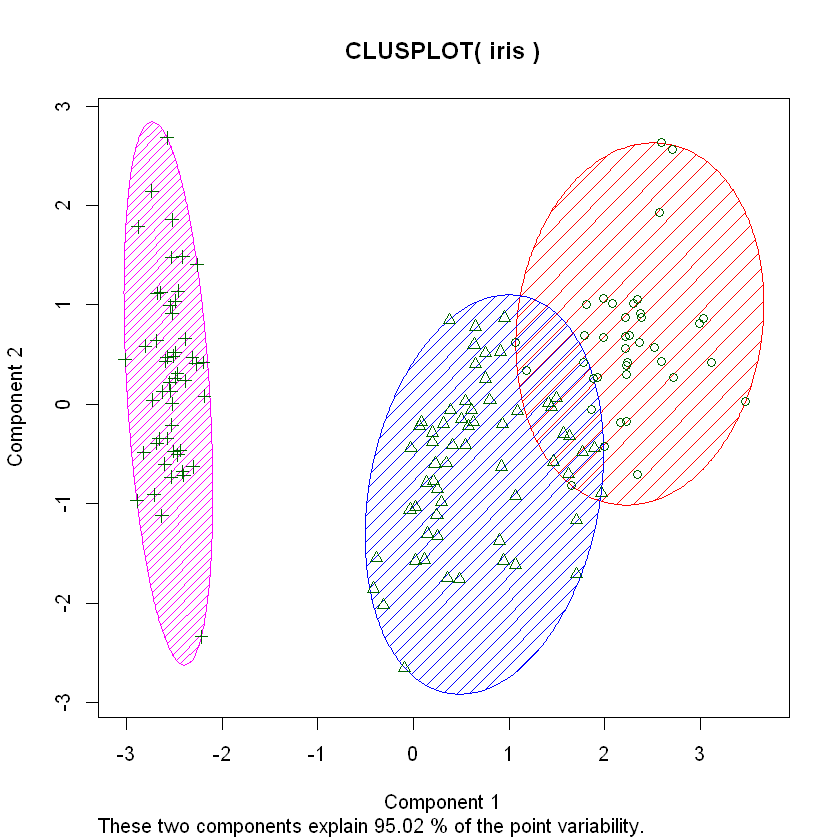

In [91]:
clusplot(iris, irisCluster$cluster, color=TRUE, shade=TRUE, labels=0,lines=0, )

# <font color='red'>K Nearest Neighbors</font>

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Get Data
We'll use the ISLR package to get the data, you can download it with the code below. Remember to call the library as well.

In [92]:
install.packages('ISLR',repos = 'http://cran.us.r-project.org')
library(ISLR)

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


We will apply the KNN approach to the Caravan data set, which is part of the ISLR library. This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is Purchase, which indicates whether or not a given individual purchases a Caravan insurance policy. In this data set, only 6% of people purchased caravan insurance.

Let's look at the structure:

In [93]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [94]:
summary(Caravan$Purchase)

No  Yes 
5474  348

## Cleaning Data
Since we are just using this data as a simple example, we won't worry about feature engineering. Let's just remove any NA values by dropping the rows with them.

In [95]:
any(is.na(Caravan))

[1] FALSE

Looks like we're good. Let's move on the standardize the variable features:

## Standardize Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

For example, let's check out the variance of two features:

In [96]:
var(Caravan[,1])

[1] 165.0378

In [97]:
var(Caravan[,2])

[1] 0.1647078

Clearly the scales are different. We are now going to standarize all the X variables except Y (Purchase). The Purchase variable is in column 86 of our dataset, so let’s save it in a separate variable because the knn() function needs it as a separate argument.

In [98]:
# save the Purchase column in a separate variable
purchase <- Caravan[,86]

# Standarize the dataset using "scale()" R function
standardized.Caravan <- scale(Caravan[,-86])

Let's check the variance again:

In [99]:
var(standardized.Caravan[,1])

[1] 1

In [101]:
var(standardized.Caravan[,2])

[1] 1

We can see that now that all independent variables (X’s) have a mean of 1 and standard deviation of 0. Great, then let’s divide our dataset into testing and training data. We'll just do a simple split of the first 1000 rows as a test set. Normally, you wouldn't do it this way. You would most likely use sample.split to create a training and test dataset:

In [102]:
# First 100 rows for test set
test.index <- 1:1000
test.data <- standardized.Caravan[test.index,]
test.purchase <- purchase[test.index]

In [103]:
# Rest of data for training
train.data <- standardized.Caravan[-test.index,]
train.purchase <- purchase[-test.index]

## Using KNN
Rememeber that we are trying to come up with a model to predict whether someone will purchase or not. We will use the knn() function to do so, and we will focus on 4 of its arguments that we need to specify. The first argument is a data frame that contains the training data set(remember that we don’t have the Y here), the second argument is a data frame that contains the testing data set (again no Y variable), the third argument is the train.purchase column (Y) that we save earlier, and the fourth argument is the k (how many neighbors). Let’s start with k = 1. knn() function returns a vector of predicted Y’s.

In [104]:
library(class)

In [105]:
set.seed(101)
predicted.purchase <- knn(train.data,test.data,train.purchase,k=1)
head(predicted.purchase)

[1] No No No No No No
Levels: No Yes

Now let’s evaluate the model we trained and see our misclassification error rate.

In [106]:
mean(test.purchase != predicted.purchase)

[1] 0.116

## Choosing K Value
Let's see what happens when we choose a different K value:

In [107]:
predicted.purchase <- knn(train.data,test.data,train.purchase,k=3)
mean(test.purchase != predicted.purchase)

[1] 0.073

Interesting. Our Misclassification rate went down. What about k=5?

In [108]:
predicted.purchase <- knn(train.data,test.data,train.purchase,k=5)
mean(test.purchase != predicted.purchase)

[1] 0.066

Should we manually change k and see which k gives us the minimal misclassification rate? NO! we have computers, so let’s automate the process with a for() loop. A loop in R repeats the same command as much as you specify. For example, if we want to check for k =1 up to 100, then we have to write 3 x 100 lines of code, but with a for loop, you just need 4 lines of code, and you can repeat those 3 lines up to as many as you want. (Note this may take awhile because you're running the model 20 times)

[Note on NULL versus NA](https://www.r-bloggers.com/r-na-vs-null/)

In [109]:
predicted.purchase = NULL
error.rate = NULL

for(i in 1:20){
    set.seed(101)
    predicted.purchase = knn(train.data,test.data,train.purchase,k=i)
    error.rate[i] = mean(test.purchase != predicted.purchase)
}

print(error.rate)

 [1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059


## Elbow Method
We can plot out the various error rates for the K values. We should see an "elbow" indicating that we don't get a decrease in error rate for using a higher K. This is a good cut-off point:

In [110]:
library(ggplot2)

k.values <- 1:20

error.df <- data.frame(error.rate,k.values)

error.df

error.rate,k.values
<dbl>,<int>
0.116,1
0.107,2
0.074,3
0.070,4
0.066,5
0.064,6
0.062,7
0.061,8
0.058,9


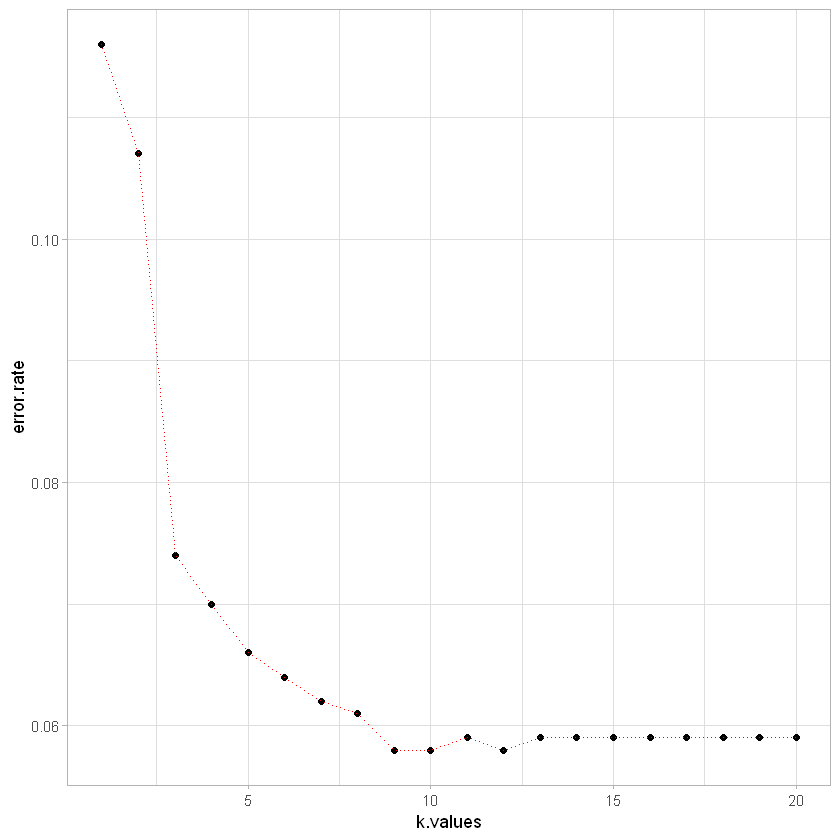

In [111]:
ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()+ geom_line(lty="dotted",color='red')

Here we can clearly see that increasing beyond K=9 does not help our misclassification at all. So we can set that as the K for our model during training.

# <font color='red'>Support Vector Machines</font>


## Get the Data
We'll use the iris data again since we are already familiar with it.

In [112]:
#install.packages('ISLR',repos = 'http://cran.us.r-project.org')
library(ISLR)

In [113]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


## Building the Model
We'll need the e1071 library. [More info here](https://cran.r-project.org/web/packages/e1071/index.html).

In [114]:
install.packages('e1071',repos = 'http://cran.us.r-project.org')
library(e1071)

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


We can use the svm() function to build and train a support vector machine model:

In [115]:
#help(svm)

In [116]:
# Model iris data with svm
model <- svm(Species ~ ., data=iris)

In [117]:
summary(model)


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




## Example Predictions
We have a small data set, so instead of splitting it into training and testing sets (which you should always try to do) we'll just score our model against the same data it was tested against:

In [118]:
predicted.values <- predict(model,iris[1:4])

In [119]:
table(predicted.values,iris[,5])

                
predicted.values setosa versicolor virginica
      setosa         50          0         0
      versicolor      0         48         2
      virginica       0          2        48

Just as we've seen before with the iris data set, the setosa values are easily separated with some noise between versicolor and virginica.

## Advanced - Tuning
We can try to tune parameters to attempt to improve our model, you can refer to the help() documentation to understand what each of these parameters means. We use the tune function:

In [120]:
# Tune for combos of gamma 0.5,1,2
# and costs 1/10 , 10 , 100
tune.results <- tune(svm,train.x=iris[1:4],train.y=iris[,5],kernel='radial',
                  ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))

In [121]:
summary(tune.results)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.04 

- Detailed performance results:
    cost gamma      error dispersion
1    0.1   0.5 0.05333333 0.08195151
2    1.0   0.5 0.04000000 0.04661373
3   10.0   0.5 0.05333333 0.06885304
4  100.0   0.5 0.06000000 0.05837300
5    0.1   1.0 0.06666667 0.07698004
6    1.0   1.0 0.05333333 0.06126244
7   10.0   1.0 0.06666667 0.07027284
8  100.0   1.0 0.06000000 0.05837300
9    0.1   2.0 0.08666667 0.08344437
10   1.0   2.0 0.06000000 0.05837300
11  10.0   2.0 0.06000000 0.06629526
12 100.0   2.0 0.05333333 0.05258738


We can now see that the best performance occurs with cost=1 and gamma=0.5. You could try to train the model again with these specific parameters in hopes of having a better model:

In [122]:
tuned.svm <- svm(Species ~ ., data=iris, kernel="radial", cost=1, gamma=0.5)

In [123]:
summary(tuned.svm)


Call:
svm(formula = Species ~ ., data = iris, kernel = "radial", cost = 1, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  59

 ( 11 23 25 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [124]:
tuned.predicted.values <- predict(tuned.svm,iris[1:4])

In [125]:
table(tuned.predicted.values,iris[,5])

                      
tuned.predicted.values setosa versicolor virginica
            setosa         50          0         0
            versicolor      0         48         2
            virginica       0          2        48

Looks like we weren't able to improve on our model. The concept of trying to tune for parameters by just trying many combinations in generally known as a grid search. In this case, we likely have too little data to actually improve our model through careful parameter selection.

# <font color='red'>Decision Trees and Random Forests</font>
A Decision Tree is a supervised, non parametric machine learning algorithm, used for both classification as well as regression problems. Decisions on how to split heavily impacts accuracy of decision tree. It splits nodes based on available input variables. Selects the input variable resulting in best homogenous dataset.

A Random forest is the most simple and widely used algorithm. Used for both classification and regression. It is an ensemble of randomized decision trees. Each decision tree gives a vote for the prediction of target variable. Random forest choses the prediction that gets the most vote.

An ensemble learning model aggregates multiple machine learning models to give a better performance. In random forest we use multiple random decision trees for a better accuracy.

Random Forest is a ensemble bagging algorithm to achieve low prediction error. It reduces the variance of the individual decision trees by randomly selecting trees and then either average them or picking the class that gets the most vote.


## Growing a Decision Tree
You may need to install the rpart library. You can find a lot more information about this library [here](https://www.rdocumentation.org/packages/rpart/versions/4.1-15/topics/rpart).

In [126]:
install.packages('rpart')
library(rpart)

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


We can then use the rpart() function to build a decision tree model:

**rpart(formula, data=, method=,control=) where**

* the formula is in the format: outcome ~ predictor1+predictor2+predictor3+ect.
* data= specifies the data frame
* method= "class" for a classification tree
* "anova" for a regression tree
* control= optional parameters for controlling tree growth.
    
    For example, control=rpart.control(minsplit=30, cp=0.001) requires that the minimum number of observations in a node be 30 before attempting a split and that a split must decrease the overall lack of fit by a factor of 0.001 (cost complexity factor) before being attempted.

## Sample Data
We'll use the kyphosis data frame which has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. It has the following columns:

* Kyphosis-a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
* Age-in months
* Number-the number of vertebrae involved
* Start-the number of the first (topmost) vertebra operated on.

Let's check out the structure:

In [127]:
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [128]:
head(kyphosis)

Kyphosis,Age,Number,Start
<fct>,<int>,<int>,<int>
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16


In [129]:
tree <- rpart(Kyphosis ~ . , method='class', data= kyphosis)

Examining Results of the Tree Model
There are lots of functions you can use to examine your tree model:

**printcp(fit)** > display cp table
<br>**plotcp(fit)**	> plot cross-validation results
<br>**rsq.rpart(fit)** > plot approximate R-squared and relative error for different splits (2 plots). labels are only appropriate for the "anova" method.
<br>**print(fit)** > print results
<br>**summary(fit)** > detailed results including surrogate splits
<br>**plot(fit)** > plot decision tree
<br>**text(fit)** > label the decision tree plot
<br>**post(fit, file=)** > create postscript plot of decision tree

Let's see a few of them:

In [130]:
printcp(tree)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error  xerror    xstd
1 0.176471      0   1.00000 1.00000 0.21559
2 0.019608      1   0.82353 0.94118 0.21078
3 0.010000      4   0.76471 1.00000 0.21559


## Tree Visualization
There are some built-in visualization capabilities from the table above, but they aren't very good looking:

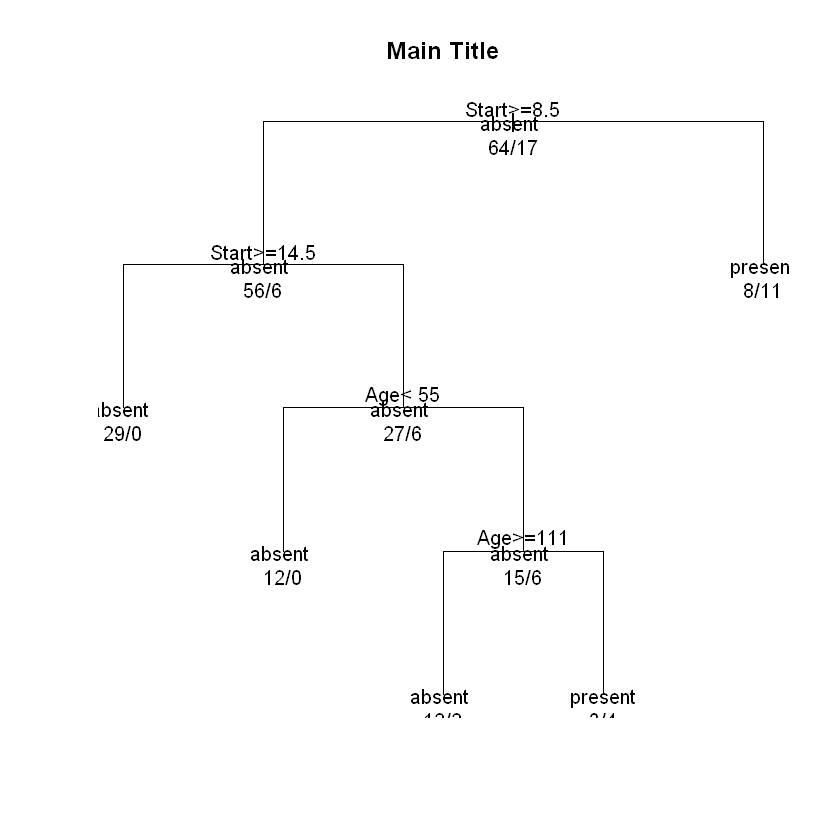

In [131]:
plot(tree, uniform=TRUE, main="Main Title")
text(tree, use.n=TRUE, all=TRUE)

The rpart.plot library package makes these visualizations much better.

In [132]:
install.packages('rpart.plot')
library(rpart.plot)

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages


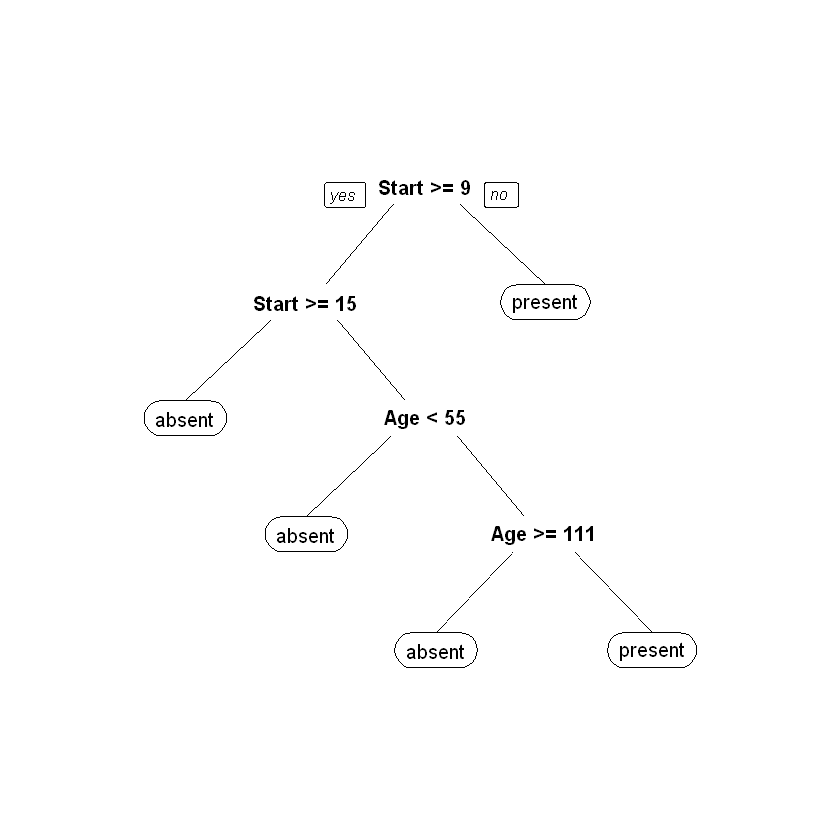

In [133]:
prp(tree)

## Random Forests
Random forests improve predictive accuracy by generating a large number of bootstrapped trees (based on random samples of variables), classifying a case using each tree in this new "forest", and deciding a final predicted outcome by combining the results across all of the trees (an average in regression, a majority vote in classification).

We can use the randomForest library to create and build out a Random Forest:

In [135]:
# Random Forest prediction of Kyphosis data
install.packages('randomForest')
library(randomForest)

Warning message:
"package 'randomForest' is in use and will not be installed"

In [136]:
model <- randomForest(Kyphosis ~ .,   data=kyphosis)

In [137]:
print(model) # view results


Call:
 randomForest(formula = Kyphosis ~ ., data = kyphosis) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.75%
Confusion matrix:
        absent present class.error
absent      60       4   0.0625000
present     12       5   0.7058824


In [138]:
importance(model) # importance of each predictor

,MeanDecreaseGini
Age,8.549515
Number,5.384647
Start,10.244527


## Conclusion
You should be beginning to feel very comfortable with the syntax for training a model on data. The key is to just understand the background of the algorithm being used and know what library to install and use for the specific algorithm being used.

# <font color='red'>Neural Networks</font>

## The Data
We will use the popular Boston dataset from the MASS package, which describes some features for houses in Boston in 1978.

CRIM - per capita crime rate by town
<br>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
<br>INDUS - proportion of non-retail business acres per town.
<br>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
<br>NOX - nitric oxides concentration (parts per 10 million)
<br>RM - average number of rooms per dwelling
<br>AGE - proportion of owner-occupied units built prior to 1940
<br>DIS - weighted distances to five Boston employment centres
<br>RAD - index of accessibility to radial highways
<br>TAX - full-value property-tax rate per 10,000 dollars
<br>PTRATIO - pupil-teacher ratio by town
<br>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
<br>LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in $1000's

We will be trying to predict the Median Value MEDV

In [139]:
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [140]:
set.seed(101)
data <- Boston

In [141]:
str(data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [142]:
summary(data)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [143]:
head(data)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [144]:
any(is.na(data))

[1] FALSE

## Neural Network Model
First you'll need to install the neural net library:

In [145]:
install.packages('neuralnet',repos = 'http://cran.us.r-project.org')
library(neuralnet)

package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jcdunne\AppData\Local\Temp\Rtmpe6sjY2\downloaded_packages



Attaching package: 'neuralnet'

The following object is masked from 'package:dplyr':

    compute



## Training the Model
As a first step, we are going to address data preprocessing. It is good practice to normalize your data before training a neural network. Depending on your dataset, avoiding normalization may lead to useless results or to a very difficult training process (most of the times the algorithm will not converge before the number of maximum iterations allowed). You can choose different methods to scale the data (z-normalization, min-max scale, etc…). Usually scaling in the intervals [0,1] or [-1,1] tends to give better results. We therefore scale and split the data before moving on:

In [146]:
maxs <- apply(data, 2, max) 
mins <- apply(data, 2, min)

In [147]:
maxs

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [148]:
mins

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

In [149]:
scaled <- as.data.frame(scale(data, center = mins, scale = maxs - mins))

In [150]:
head(scaled)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


## Train and Test Sets
Now with our standardized data, let's split it:

In [151]:
install.packages('caTools')
library(caTools)
split = sample.split(scaled$medv, SplitRatio = 0.70)

train = subset(scaled, split == TRUE)
test = subset(scaled, split == FALSE)

Warning message:
"package 'caTools' is in use and will not be installed"

## Training the Model

#### Formula for Neural Net
For some odd reasons, the neuralnet() function won't accept a formula in the form: y~. that we are used to using. Instead you have to call all the columns added together. Here is some convience code to help quickly create that formula:

In [152]:
# Get column names
n <- names(train)

In [153]:
n

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [154]:
# Paste together
f <- as.formula(paste("medv ~", paste(n[!n %in% "medv"], collapse = " + ")))

In [155]:
f

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

In [156]:
nn <- neuralnet(f,data=train,hidden=c(5,3),linear.output=TRUE)

## Neural Net Visualization
You can plot out your model to see a very neat visualization with the weights on each connection.

The black lines show the connections between each layer and the weights on each connection while the blue lines show the bias term added in each step. The bias can be thought as the intercept of a linear model. The net is essentially a black box so we cannot say that much about the fitting, the weights and the model. Suffice to say that the training algorithm has converged and therefore the model is ready to be used.

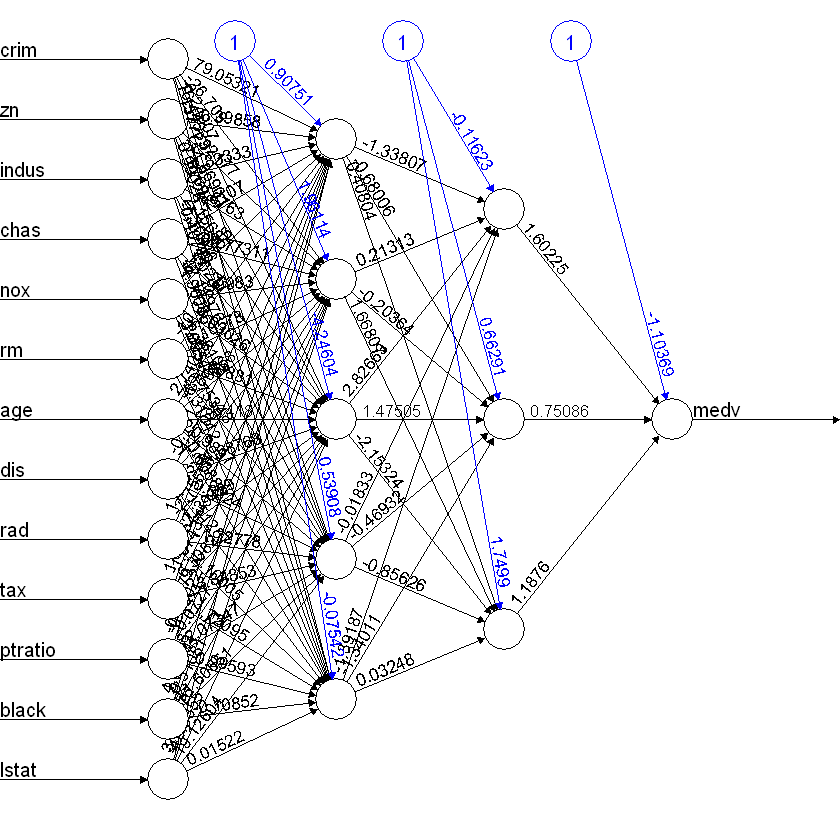

In [165]:
library(neuralnet)
plot(nn, rep="best")

## Predictions using the Model
Now we can try to predict the values for the test set and calculate the MSE. Remember that the net will output a normalized prediction, so we need to scale it back in order to make a meaningful comparison (or just a simple prediction).

In [166]:
# Compute Predictions off Test Set
predicted.nn.values <- compute(nn,test[1:13])

In [167]:
# Its a list returned
str(predicted.nn.values)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:139, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : NULL
 $ net.result: num [1:139, 1] 0.512 0.411 0.324 0.209 0.334 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. ..$ : NULL


In [168]:
# Convert back to non-scaled predictions
true.predictions <- predicted.nn.values$net.result*(max(data$medv)-min(data$medv))+min(data$medv)

In [169]:
# Convert the test data
test.r <- (test$medv)*(max(data$medv)-min(data$medv))+min(data$medv)

In [170]:
# Check the Mean Squared Error
MSE.nn <- sum((test.r - true.predictions)^2)/nrow(test)

In [171]:
MSE.nn

[1] 15.1656

## Visualize Error

In [172]:
error.df <- data.frame(test.r,true.predictions)

In [173]:
head(error.df)

,test.r,true.predictions
,<dbl>,<dbl>
1,24.0,28.01789
2,21.6,23.48092
8,27.1,19.56681
9,16.5,14.42056
11,15.0,20.01032
12,18.9,20.28283


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


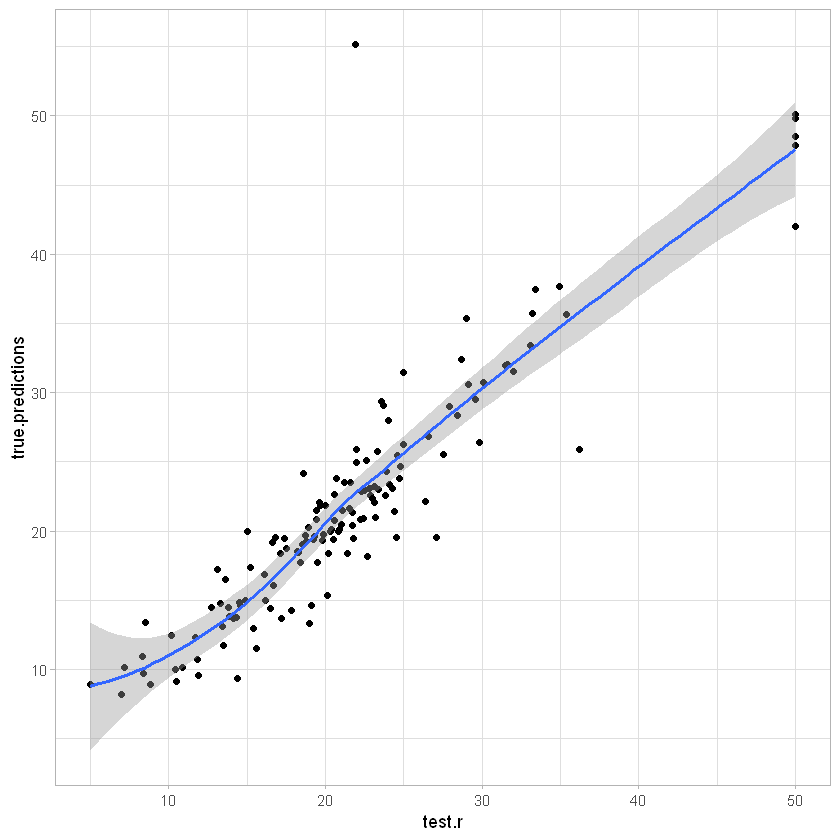

In [174]:
library(ggplot2)
ggplot(error.df,aes(x=test.r,y=true.predictions)) + geom_point() + stat_smooth()

Looks like a few houses threw off our model, but overall its not looking too bad considering we're pretty much treating it like a total black box.

## Conclusion
Neural networks resemble black boxes a lot: explaining their outcome is much more difficult than explaining the outcome of simpler model such as a linear model. Therefore, depending on the kind of application you need, you might want to take into account this factor too. Furthermore, as you have seen above, extra care is needed to fit a neural network and small changes can lead to different results.